In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
harmful_2_df = pd.read_csv('harmful_2_learning.csv')
#columns = ['url','img_num','child_num','harmful_weight','learn_idx']

harmful_url_dic = {'sex': 1, 'porn': 1, 'gay': 1, 'movi': 1, 'movie': 1, 'tube': 1, 'pornhub':1,
                   'xxx': 1, 'fuck': 1, 'pic': 1, 'dick': 1, 'hot': 1,
                   'anal': 1, 'asian': 1, 'adult': 1, 'shemal': 1, 'cartoon':1,
                   'pictur': 1, 'picture': 1, 'lesbian': 1,

                   'teen': 2, 'big': 2, 'girl': 2, 'pussi': 2, 'ass': 2, 'tit': 2, 'amateur': 2, 'matur': 2, 'boy': 2,
                   'babe': 2, 'cock': 2,'milf': 2, 'sexi': 2, 'bebe':2, 'nud':2,
                   'pic': 2, 'blond': 2, 'nude': 2, 'hairi': 2, 'blowjob': 2, 'cum': 2, 'young': 2,
                   'hardcor': 2, 'hardcore': 2 ,

                   'game': 3, 'casino': 3, 'play': 3, 'onlin': 3,'online':3, 
                   'card': 3,  'race': 3,  'admin': 3,

                   'escort': 4, 'london': 4, 'servic': 4, 'service':4, 'agenc': 4,
                   'galleri': 4,'massag': 4, 'model': 4, 'femal': 4, 'fmale': 4,
                   'vip': 4, 'book': 4, 'uk': 4, 'russian': 4, 'profil': 4,
                   'busti': 4, 'class': 4, 'adult': 4, 'york': 4,
                   
                   'cam':5, 'video':5, 'chat':5, 'webcam': 5,
                   
                   'domain':7, 'domains':7, 'gateway':7
}

def word_idx(top20):
    list = top20.split()
    for word in list:
        if word in harmful_url_dic:
            return harmful_url_dic[word]
            break;
    return 0

def img_idx(num):
    if num < 10 : return 0
    elif (num >=10)&(num<50): return 1
    elif (num >=50)&(num<100): return 2
    elif (num >=100)&(num<200): return 3
    else: return 4

def child_idx(num):
    if num < 5 : return 0
    elif (num >=5)&(num<10): return 1
    elif (num >=10)&(num<25): return 2
    else: return 3

def img_child(img, child):
    if img >= child: return 0
    else: return 1

def target(wi, ic, hw):
    if hw < 0.125 :
        if wi == 0: return 0
        elif wi == 7: return 7
        else: return wi
        
    elif hw >= 0.125 and hw < 0.5:
        if ic == 1 : return 6
        else: return wi
        
    # harmful_weight >= 0.5    
    else:
        if wi == 0 or wi ==7 : return 7
        elif ic == 1: return 6
        else: return wi
    
harmful_2_df['word_idx'] = harmful_2_df['top_word'].apply(lambda x : word_idx(x))
harmful_2_df['img_child'] = harmful_2_df.apply(lambda x : img_child(x['img_num'],x['child_num']),axis=1)
harmful_2_df['img_num'] = harmful_2_df['img_num'].apply(lambda x : img_idx(x))
harmful_2_df['child_num'] = harmful_2_df['child_num'].apply(lambda x : child_idx(x))
 
harmful_2_df['target'] = harmful_2_df.apply(lambda x : target(x['word_idx'],x['img_child'],x['harmful_weight']),axis=1)

harmful_2_df.head(3)

,url_id,url,url_harmful_idx,harmful_word_num,harmful_child_num,img_num,child_num,harmful_weight,top_word,word_idx,img_child,target
0,5,madteenies.com,2,10,3,1,1,0.750,big password free login mad madthumb porn porn...,2,0,2
1,15,porntube.com,1,10,4,1,1,0.750,big anal blond fuck babe pussi ass hard hot in...,2,0,2
2,51,mydickdorms.com,1,3,7,3,2,0.575,bareback author dude first last licens mg mode...,4,0,4


In [2]:
harmDF = harmful_2_df[['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']]
harmDF.data = harmDF.values.tolist()
harmDF.target = harmful_2_df[['target']]
harmDF.feature_names=['url_harmful_idx','img_num','child_num','harmful_weight','word_idx']
harmDF.target_names=['none','porn','teen','gambling','escort','cam','hub','domain']
harmDF.head(3)

,url_harmful_idx,img_num,child_num,harmful_weight,word_idx
0,2,1,1,0.750,2
1,1,1,1,0.750,2
2,1,3,2,0.575,4


In [14]:

X_train, X_test, y_train, y_test = train_test_split(
    harmDF.data, harmDF.target, stratify=harmDF.target, random_state=42)


tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.888


In [34]:
depth = [2,4,6,8,9,10,12,14]
for x in depth:
    tree = DecisionTreeClassifier(max_depth=x, random_state=0)
    tree.fit(X_train, y_train)
    pred = tree.predict(X_test)
    print("Depth : ",x)
    print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))



Depth :  2
훈련 세트 정확도: 0.555
테스트 세트 정확도: 0.536
Depth :  4
훈련 세트 정확도: 0.824
테스트 세트 정확도: 0.792
Depth :  6
훈련 세트 정확도: 0.904
테스트 세트 정확도: 0.888
Depth :  8
훈련 세트 정확도: 0.971
테스트 세트 정확도: 0.904
Depth :  9
훈련 세트 정확도: 0.973
테스트 세트 정확도: 0.912
Depth :  10
훈련 세트 정확도: 0.987
테스트 세트 정확도: 0.888
Depth :  12
훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.888
Depth :  14
훈련 세트 정확도: 0.992
테스트 세트 정확도: 0.888


In [35]:
tree = DecisionTreeClassifier(max_depth=9, random_state=0)
tree.fit(X_train, y_train)
pred = tree.predict(X_test)


print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.973
테스트 세트 정확도: 0.912


In [36]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree2.dot", class_names=harmDF.target_names,
                feature_names=harmDF.feature_names, impurity=False, filled=True)

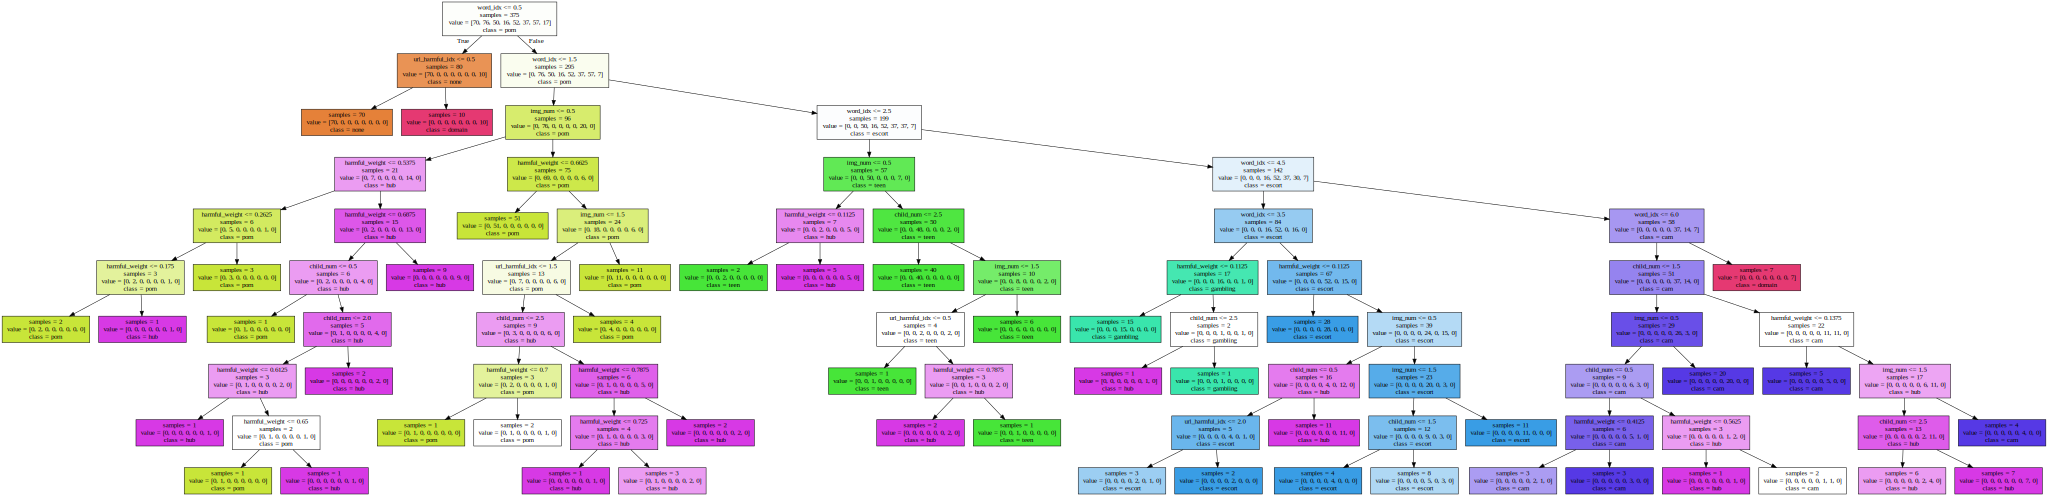

In [37]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree2.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[ 0.068  0.112  0.048  0.08   0.692]
url_harmful_idx : 0.068
img_num : 0.112
child_num : 0.048
harmful_weight : 0.080
word_idx : 0.692


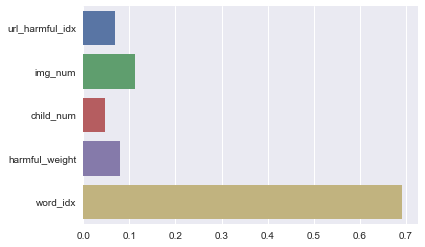

In [38]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(tree.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(harmDF.feature_names , tree.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
sns.barplot(x=tree.feature_importances_ , y=harmDF.feature_names)

In [39]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.metrics import f1_score 

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='macro')
    recall = recall_score(y_test , pred, average='macro')
    # F1 스코어 추가
    f1 = f1_score(y_test,pred, average='macro')
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    
    
get_clf_eval(y_test,pred)
pred

오차 행렬
[[24  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  2  0]
 [ 0  0 16  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0]
 [ 0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0 10  2  0]
 [ 1  6  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  6]]
정확도: 0.9120, 정밀도: 0.9379, 재현율: 0.9231, F1:0.9283


array([2, 6, 2, 0, 0, 5, 1, 7, 4, 5, 5, 6, 1, 2, 7, 1, 2, 1, 5, 1, 1, 6, 4,
       4, 0, 1, 1, 0, 4, 1, 3, 6, 1, 6, 0, 1, 0, 2, 7, 3, 5, 4, 1, 7, 4, 0,
       1, 1, 0, 2, 0, 1, 0, 1, 5, 5, 0, 0, 4, 2, 7, 4, 0, 1, 6, 4, 6, 1, 4,
       2, 4, 2, 4, 4, 3, 1, 7, 6, 1, 1, 0, 0, 2, 0, 6, 2, 4, 0, 6, 5, 0, 0,
       2, 1, 3, 5, 2, 2, 6, 2, 1, 2, 0, 6, 1, 1, 4, 6, 1, 0, 6, 1, 4, 6, 5,
       1, 0, 6, 0, 3, 0, 3, 1, 4, 0], dtype=int64)